In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/smartcart_customers.csv')
df1 = df.copy()

In [3]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [4]:
df1.shape

(2240, 22)

In [5]:
df1.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

# Data preprocessing

## 1. handle missing values

In [6]:
df1['Income'] = df1['Income'].fillna(df1['Income'].median())

In [7]:
df1.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Response               0
dtype: int64

## 2. Feature engineering

In [8]:
# Age
df1['Age'] = 2026 - df1['Year_Birth']

In [9]:
# Customer Joining Date
df1['Dt_Customer'] = pd.to_datetime(df1['Dt_Customer'], dayfirst=True)
reference_date = df1['Dt_Customer'].max()

df1['Customer_Tenure_Days'] = (reference_date - df1['Dt_Customer']).dt.days

In [10]:
# Spending
df1['Total_Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [11]:
# Children
df1['Total_Children'] = df1['Kidhome'] + df1['Teenhome']

In [12]:
# Education
# Undergraduare, Graduate, Postgraduate
df1['Education'] = df1['Education'].replace ({
    'Basic':'Undergraduate', '2n Cycle':'Undergraduate',
    'Graduation':'Graduate',
    'Master' : 'Postgraduate', 'PhD': 'Postgraduate'
})

df1['Education'].value_counts()

Education
Graduate         1127
Postgraduate      856
Undergraduate     257
Name: count, dtype: int64

In [13]:
# Marital Status
df1['Living_With'] = df1['Marital_Status'].replace ({
    'Married':'Partner', 'Together':'Partner',
    'Single':'Alone', 'Divorced': 'Alone',
    'Widow' : 'Alone', 'Absurd': 'Alone', 'YOLO': 'Alone'
})

df1['Living_With'].value_counts()

Living_With
Partner    1444
Alone       796
Name: count, dtype: int64

## Drop columns

In [14]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0


In [15]:
cols = ['ID', 'Year_Birth', 'Marital_Status', 'Kidhome', 'Teenhome', 'Dt_Customer']
spending_cols = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

cols_to_drop = cols + spending_cols

df_cleaned = df1.drop(columns = cols_to_drop)

In [16]:
df_cleaned.shape

(2240, 15)

In [17]:
df_cleaned.head()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Age,Customer_Tenure_Days,Total_Spending,Total_Children,Living_With
0,Graduate,58138.0,58,3,8,10,4,7,0,1,69,663,1617,0,Alone
1,Graduate,46344.0,38,2,1,1,2,5,0,0,72,113,27,2,Alone
2,Graduate,71613.0,26,1,8,2,10,4,0,0,61,312,776,0,Partner
3,Graduate,26646.0,26,2,2,0,4,6,0,0,42,139,53,1,Partner
4,Postgraduate,58293.0,94,5,5,3,6,5,0,0,45,161,422,1,Partner


# Outliers

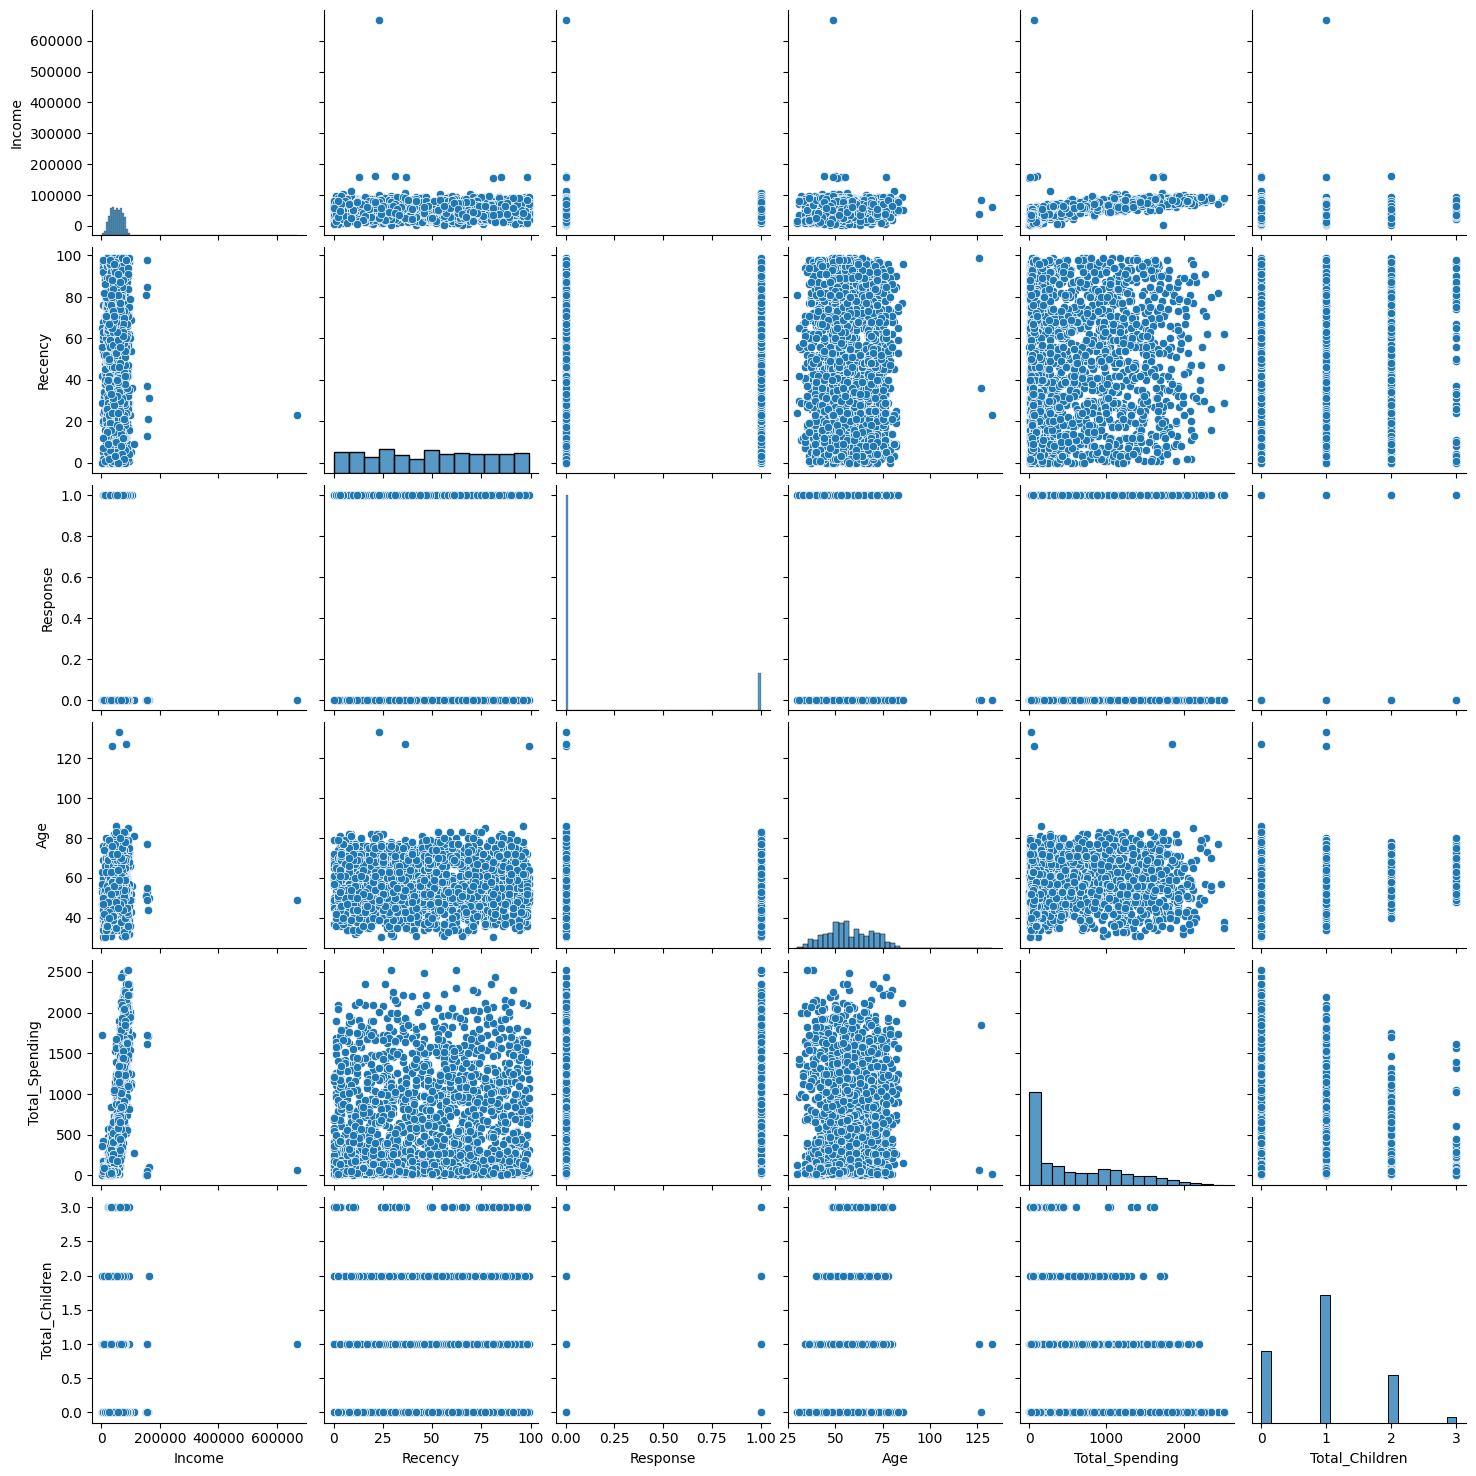

In [18]:
cols = ['Income', 'Recency', 'Response', 'Age', 'Total_Spending', 'Total_Children']

# relative plots of some features - pair plors
sns.pairplot(df_cleaned[cols])

In [19]:
# Remove outliers

print('data size with outliers:', len(df_cleaned))

df_cleaned = df_cleaned[(df_cleaned['Age'] < 90)]
df_cleaned = df_cleaned[(df_cleaned['Income'] < 600_000)]

print('data size without outliers:', len(df_cleaned))

data size with outliers: 2240
data size without outliers: 2236


# Heatmap

In [20]:
corr = df_cleaned.corr(numeric_only = True)

<Axes: >

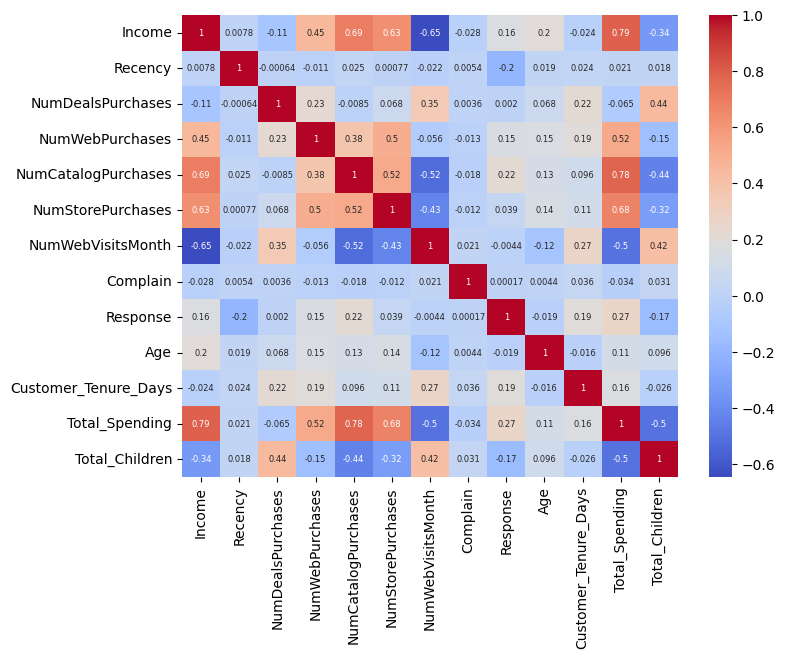

In [21]:
plt.figure(figsize = (8, 6))
sns.heatmap (
    corr, 
    annot = True,
    annot_kws={'size': 6},
    cmap = 'coolwarm'
)


In [22]:
df_cleaned.shape

(2236, 15)

In [23]:
df_cleaned.to_csv('../data/processed_data.csv', index = False)